In [6]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/yoavfreund/miniforge3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['norm', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [74]:
def row_normalize(K):
    return (K.T/(sum(K,axis=1))).T
def col_normalize(K):
    return (K/(sum(K,axis=0)))

In [75]:
n=500  # Kernel array size is 2*n+2
X=arange(0,1+0.1/n,1/n)
X.shape

(501,)

<Figure size 432x288 with 0 Axes>

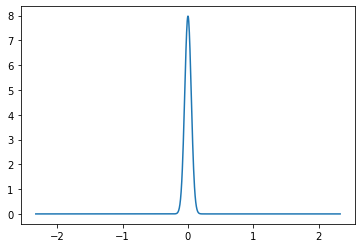

<Figure size 432x288 with 0 Axes>

In [95]:
#define kernel
from scipy.stats import norm
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 2*n+2)
kernel_scale=0.05
kernel = norm(scale=kernel_scale).pdf(x)
plot(x,kernel)
figure()
## define matrix

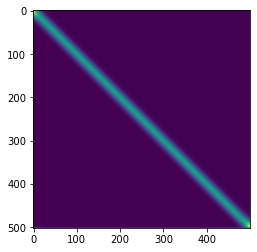

In [161]:
K=np.zeros([n+2,n])
for i in range(n+2):
    for j in range(n):
        K[i,j]=kernel[int(i-j+n)]

gamma=3
K[-1,:]=gamma

K=col_normalize(K)

imshow(K)

(0.0, 0.40796258392004353)

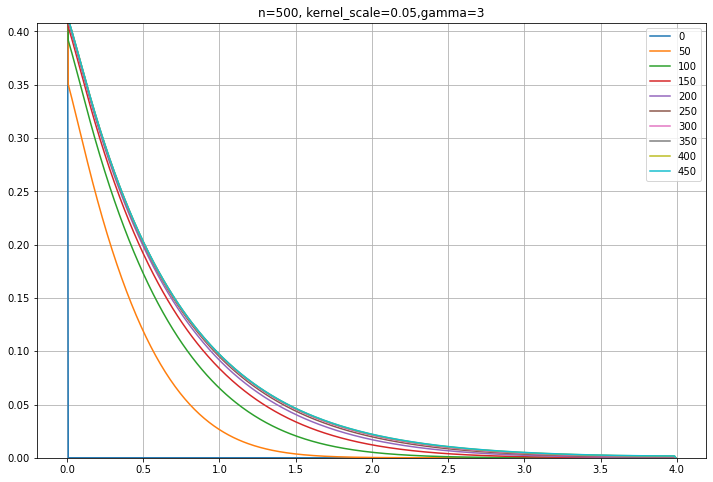

In [163]:
figure(figsize=[12,8])
V=zeros(n+2)
V[0]=1; #V[0:int(n/10)]=1; 
V[-1]=0
X=arange(0,4,4/V.shape[0])
for i in range(500):
    if i % 50 ==0 :
        plot(X,V,label=str(i))
    V[1:-1]=np.dot(V,K)
    #V[0:int(n/10)]=1;  
    #V[0]=1; V[-1]=0
legend()
grid()
title(f'n={n}, kernel_scale={kernel_scale},gamma={gamma}');
ylim([0,V[2]])

In [164]:
V[-10:]

array([0.0018265 , 0.00182137, 0.00181634, 0.00181137, 0.00180642,
       0.00180145, 0.00179641, 0.00179123, 0.00178586, 0.        ])

/var/folders/cl/mbdp3zfx4cg9mmnz60g052540000gn/T/ipykernel_72116/1632259689.py:1: RuntimeWarning: divide by zero encountered in log
  plot(log(V))


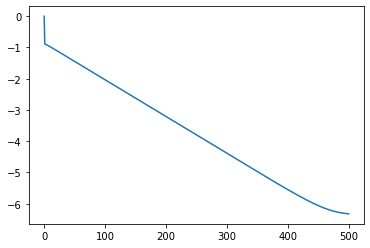

In [165]:
plot(log(V))

0 0.6577817976739704
1 0.06661312240318823
2 0.013582917369243521
3 0.003957257021116161
4 0.0014084017231641795
5 0.0005707714233715612
6 0.0002537662124063215
7 0.00012103930443113345
8 6.103541913871373e-05
9 3.2209038522384755e-05


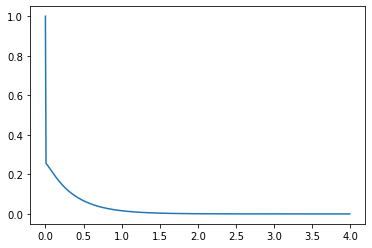

In [166]:
for gamma in range(10):

    K=np.zeros([n+2,n])
    for i in range(n+2):
        for j in range(n):
            K[i,j]=kernel[int(i-j+n)]

    K[-1,:]=gamma

    K=col_normalize(K)
    V=zeros(n+2)
    V[0]=1; #V[0:int(n/10)]=1; 
    V[-1]=0
    X=arange(0,4,4/V.shape[0])
    for i in range(1000):

        V[1:-1]=np.dot(V,K)
    print(gamma,V[int(0.8*n)])
plot(X,V,label=str(i))

(5, 0.0005707714233715612)